Try conditioning with [pysheds](https://github.com/ianhorn/pysheds/blob/master/docs/dem-conditioning.md)

In [1]:
%pip install seaborn
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid
import seaborn as sns

# set the working directory
working_directory = 'data/temp_pysheds'
os.chdir(working_directory)
os.getcwd()

Note: you may need to restart the kernel to use updated packages.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


'/Users/ianhorn/Documents/CodeKy/pathways/data-analysis/codeky-da-capstone/project/data/temp_pysheds'

In [ ]:
# create a grid from raster
dem = "S1A_IW_20250217T233955_DVP_RTC10_G_gdufem_E701_dem.tif"
grid = Grid.from_raster(dem, nodata=-9999)
dem = grid.read_raster(dem, nodata=-9999)


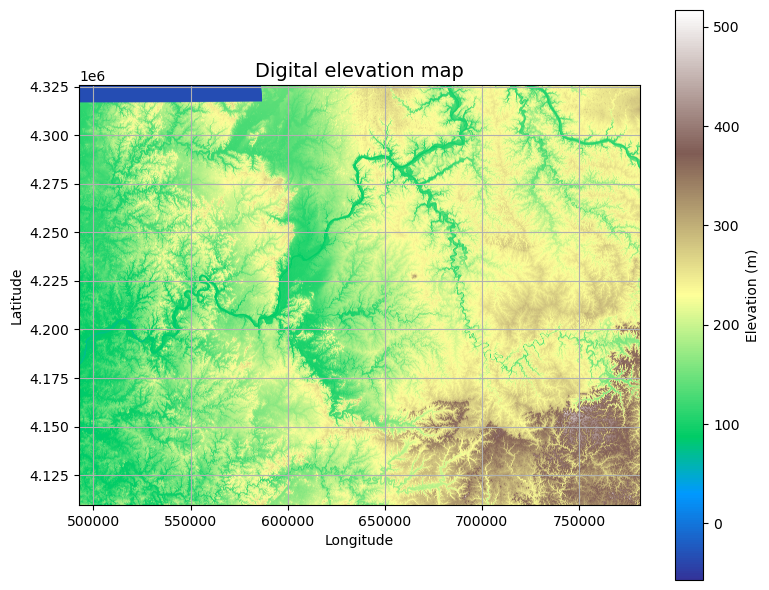

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('Digital elevation map', size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

In [4]:
depressions = grid.detect_depressions(pit_filled_dem)


NameError: name 'pit_filled_dem' is not defined

In [ ]:
# Plot depressions
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)

plt.imshow(depressions, cmap='Greys_r', zorder=1)
plt.title('Depressions', size=14)
plt.tight_layout()